### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

Note: This set of benchmarks exercises new observable-oriented assessments currently under development.
This is a WORK-IN-PROGRESS as the results data are not plotted currently.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=4
max_qubits=16
skip_qubits=1
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
#backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}


In [3]:
# Configure benchmark library modules
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/qiskit")

import execute
execute.verbose = False
execute.verbose_time = False
#execute.noise = None

# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "qiskit")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False


### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/tfim/tfim.zip
       using cached data if possible
... execution starting at Jan 28, 2025 21:12:59 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... total execution time = 0.031
... exact computation time = 0.007 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.4102
    ==> Simulation Quality: 0.853

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... total execution time = 0.026
... exact computation time = 0.009 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -2.5977
    ==> Simulation Quality: 0.866

************
Executing [1] circuits with nu

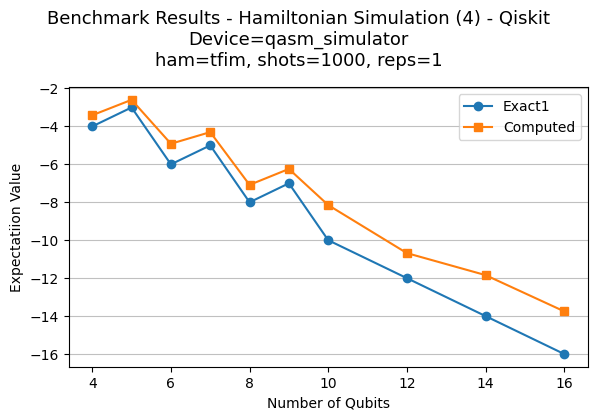

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name,
                hamiltonian_params = hamiltonian_params,  
                do_observables = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/bosehubbard/BH_D-1_d-4.zip
       using cached data if possible
... execution starting at Jan 28, 2025 21:13:03 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... total execution time = 0.734
... exact computation time = 0.048 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: 4.8931
    ==> Simulation Quality: 0.082

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... total execution time = 1.473
... exact computation time = 0.127 sec

    Exact expectation value, computed classically: 90.0
    Estimated expectation value, from quantum algorithm: 7.7059
    ==> Simulation Quality:

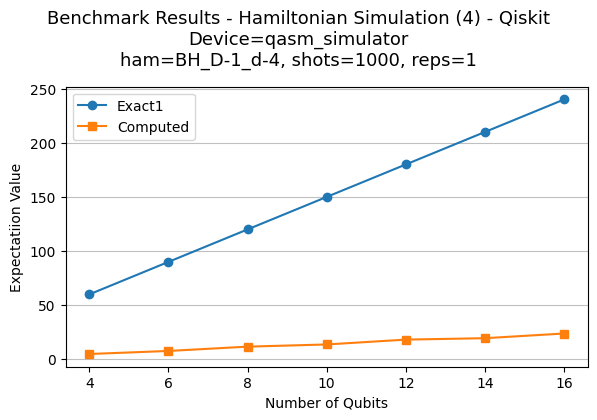

In [5]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=4, hamiltonian = hamiltonian_name,
    hamiltonian_params = hamiltonian_params,
    do_observables = True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/binaryoptimization/max3sat/random/random_max3sat-hams.zip
       using cached data if possible
... execution starting at Jan 28, 2025 21:13:45 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... total execution time = 0.044
... exact computation time = 0.017 sec

    Exact expectation value, computed classically: 7.0
    Estimated expectation value, from quantum algorithm: 8.0
    ==> Simulation Quality: 1.143

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... total execution time = 0.048
... exact computation time = 0.024 sec

    Exact expectation value, computed classically: 8.0
    Estimated expectation value, from quantum algorithm: 8.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_

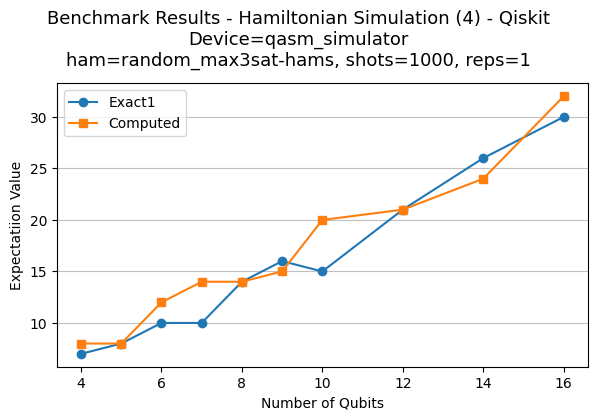

In [6]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name,
                hamiltonian_params = hamiltonian_params,
                do_observables = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/chemistry/electronic/standard/H2.zip
       using cached data if possible
... execution starting at Jan 28, 2025 21:13:50 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... total execution time = 0.09
... exact computation time = 0.026 sec

    Exact expectation value, computed classically: -0.5367
    Estimated expectation value, from quantum algorithm: -0.3999
    ==> Simulation Quality: 0.745

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... total execution time = 3.005
... exact computation time = 0.105 sec

    Exact expectation value, computed classically: -0.5102
    Estimated expectation value, from quantum algorithm: 2.1178
    ==> Simulation Quality: -4.151

************
Executing [1] circuits with num_qubits = 8
... dataset_name = ham_BK-8
... t

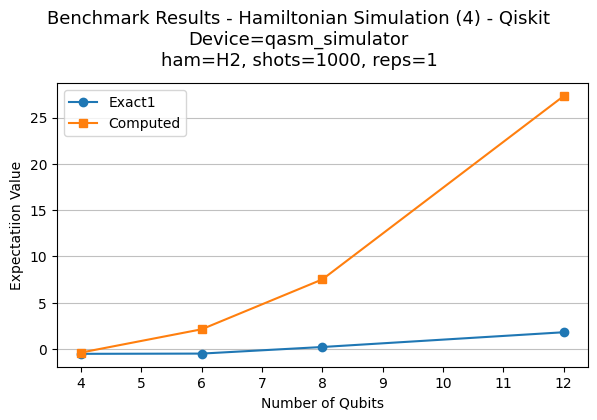

In [7]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name,
                hamiltonian_params = hamiltonian_params,
                do_observables = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Combined Benchmark Results

In [8]:
import qiskit
print(qiskit.__version__)

1.2.1
